## EDA
-----

In [30]:
import pandas as pd
import geopandas as gpd
import os

import matplotlib.pyplot as plt
import seaborn as sns


1. Read CSV file into pandas  

In [2]:
dirName = '/Users/mikhailgasanov/Downloads/EVdatasets/PaloAlto/'
fnames = os.listdir(dirName)
fnames


['ElectricVehicleChargingStationUsageJuly2011Dec2020.csv',
 'ElectricVehicleChargingStationUsageJuly2011Dec2017.csv']

In [3]:
df = pd.read_csv(os.path.join(dirName, fnames[0]))

In [4]:
df.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


In [5]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

In [17]:
cols_to_plot = ['Latitude', 'Longitude',
                'Total Duration (hh:mm:ss)',       
                'Charging Time (hh:mm:ss)', 
                'Energy (kWh)']


In [18]:
gdf = gpd.GeoDataFrame(data=df[cols_to_plot], geometry=gpd.points_from_xy(x=df['Latitude'], y=df['Longitude']))

In [24]:
gdf.geometry.nunique()

7

In [20]:
token

'pk.eyJ1IjoibWlzaGFncm9sIiwiYSI6ImNrdGtjbHV5aTFrd20ydW11bDdobWtoaTkifQ.4o97K1zdDfY61Sj9377N6Q\n'

In [27]:
import plotly.express as px
import base64
import plotly.graph_objects as go

token = open('../.mapbox_token').read()


fig_1 = px.scatter_mapbox(gdf, lat='Latitude', lon='Longitude',
                          color='Energy (kWh)',
                         color_continuous_scale='blues',
                          zoom=16, height=600)

fig_1.update_layout(mapbox_style="satellite",mapbox_accesstoken=token )

fig_1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig_1.update_traces(marker=dict(size=16))

2. Distributions of : 
* Total Duration (hh:mm:ss)      
* Charging Time (hh:mm:ss)
* Energy (kWh)

<AxesSubplot:xlabel='Energy (kWh)', ylabel='Density'>

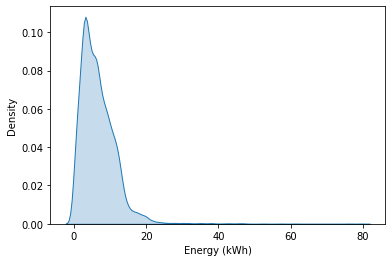

In [33]:
sns.kdeplot(x='Energy (kWh)', data=gdf, fill=True)


sns.kdeplot(x='Total Duration (hh:mm:ss)', data=gdf, fill=True)

In [38]:
gdf.loc[:, 'Total Duration (hh:mm:ss)'] = pd.to_datetime(gdf.loc[:, 'Total Duration (hh:mm:ss)'])

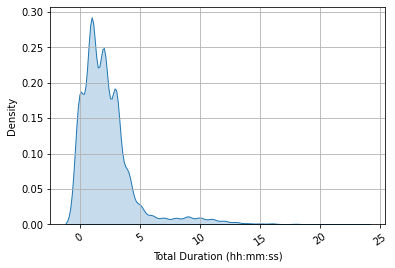

In [50]:
sns.kdeplot(gdf.loc[:, 'Total Duration (hh:mm:ss)'].dt.hour, fill=True)
plt.grid()
plt.xticks(rotation=35)
plt.show()

In [56]:
df.loc[:, 'End Date'] = pd.to_datetime(df['End Date'])

In [61]:
hours_df = df.groupby(df['End Date'].dt.hour).mean()

<AxesSubplot:xlabel='End Date'>

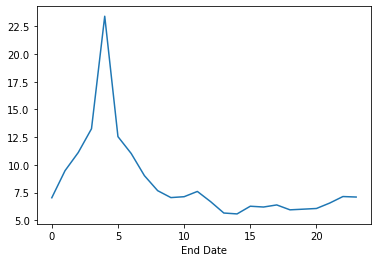

In [63]:
hours_df['Energy (kWh)'].plot()

In [ ]:
sns.kdeplot(x='Energy (kWh)', data=gdf, fill=True)

<AxesSubplot:xlabel='UTCTransactionStop'>

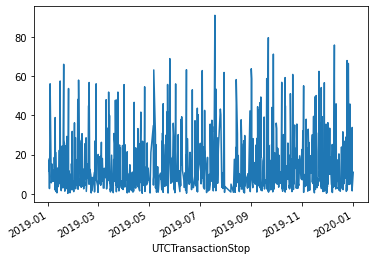

In [18]:
df.set_index('UTCTransactionStop').iloc[::10, :]['TotalEnergy'].plot()